In [79]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
staff = pd.read_csv('staff_my_voice.csv')
students = pd.read_csv('student_my_voice.csv')
staff.rename(columns = {'Total in Agreement': 'Total Agree', 'Disagree.1':'Strongly Disagree'}, inplace=True)
students.rename(columns = {'Total in Agreement': 'Total Agree', 'Disagree.1':'Strongly Disagree'}, inplace=True)

for c in staff.columns[2:-1]:
    staff[c] = staff[c].str.replace('%', '')
    staff[c] = staff[c].astype(float)
    students[c] = students[c].str.replace('%', '')
    students[c] = students[c].astype(float)

staff.head()

,Category,Question,Total Agree,Strongly Agree,Agree,Undecided,Disagree,Strongly Disagree,Total Disagree,Did Not Answer,Total Positive,Wording
0,Belonging,1. I feel valued for my unique skills and talents,68.9,15.1,53.8,11.8,14.3,5.0,19.3,0.0,68.9,0
1,Belonging,2. School is a welcoming and friendly place,79.0,13.4,65.5,15.1,4.2,1.7,5.9,0.0,79.0,0
2,Belonging,3. I am proud of my school,82.9,32.5,50.4,9.4,6.0,1.7,7.7,1.7,82.9,0
3,Belonging,4. I think bullying is a problem at my school,50.8,11.0,39.8,23.7,23.7,1.7,25.4,0.8,25.4,1
4,Belonging,5. I feel comfortable in the staff room,64.4,16.1,48.3,15.3,12.7,7.6,20.3,0.8,64.4,0


Explanation of the columns in the table above: 
- Each question has a general 'Category'
- Total Agree is the sum of Strongly Agree and Agree
- Total Disagree is the sum of Disagree and Strongly Disagree
- Wording is 0 for positive (something we want to agree highly) and 1 for negative (statements we would want to disagree with).
- Total Positive is equal to Total Agree if Wording is positive and Total Disagree if Wording is negative. The higher the better.

## Staff Analysis
Below you can see the average of total percentage of positive answers for each of the main categories. In general it seems staff has fun, is confident, enjoys support from colleagues. However it seems administration, leadership, and communication could be areas of improvement.

In [77]:

catStaff = staff.groupby('Category')
catStaff['Total Positive'].mean()

Category
Administration and Communication    54.283333
Belonging                           63.650000
Confidence to Take Action           83.200000
Curiosity & Creativity              66.362500
Fun & Excitement                    88.742857
Heroes                              84.287500
Leadership & Responsibility         62.957143
Sense of Accomplishment             69.866667
Spirit of Adventure                 65.557143
Name: Total Positive, dtype: float64

Below is a list of the questions that were low (<50%) positive  answers. Some things to look into is that majority of staff (50.8%) agree that bullying is a problem while only 25.5% disagree. This is why there is only a 25.4% persent Total Positive amount. Since we would want everyone to agree that bullying is **not** a problem at our school. This is something to look into and so is lack of meaningful professional development #36, lack of effective communication #60, lack of decision making, and lack of administration learning from staff.

In [119]:
posStaff = staff[staff['Total Positive'] < 50.0]

# posStaff.set_index('Question', inplace=True)

posStaff = posStaff.reindex(columns=["Category", "Question", "Total Agree", "Strongly Agree", "Agree", "Undecided", 
                                     "Disagree", "Strongly Disagree","Did Not Answer", "Total Disagree", "Total Positive",
                                     "Wording"])
posStaff.head(len(posStaff))

,Category,Question,Total Agree,Strongly Agree,Agree,Undecided,Disagree,Strongly Disagree,Did Not Answer,Total Disagree,Total Positive,Wording
3,Belonging,4. I think bullying is a problem at my school,50.8,11.0,39.8,23.7,23.7,1.7,0.8,25.4,25.4,1
5,Belonging,6. Building administration makes an effort to ...,43.6,9.4,34.2,17.1,23.1,16.2,1.7,39.3,43.6,0
20,Sense of Accomplishment,21. I am recognized when I try my best,44.4,7.7,36.8,24.8,25.6,5.1,1.7,30.7,44.4,0
35,Curiosity & Creativity,36. Meaningful professional development opport...,36.4,4.2,32.2,22.0,18.6,22.9,0.8,41.5,36.4,0
36,Curiosity & Creativity,37. I feel comfortable asking questions in sta...,44.4,11.1,33.3,20.5,20.5,14.5,1.7,35.0,44.4,0
37,Spirit of Adventure,38. Setting yearly goals with my supervisor is...,43.7,10.1,33.6,16.8,26.1,13.4,0.0,39.5,43.7,0
43,Spirit of Adventure,44. I am excited to tell my colleagues when I ...,47.9,7.7,40.2,23.9,19.7,8.5,1.7,28.2,47.9,0
45,Leadership & Responsibility,46. My colleagues see me as a leader,46.2,7.6,38.7,39.5,13.4,0.8,0.0,14.2,46.2,0
46,Leadership & Responsibility,47. I have a voice in decision making at school,39.0,4.2,34.7,21.2,23.7,16.1,0.8,39.8,39.0,0
50,Leadership & Responsibility,51. Building administration is willing to lear...,39.3,6.8,32.5,25.6,17.9,17.1,1.7,35.0,39.3,0


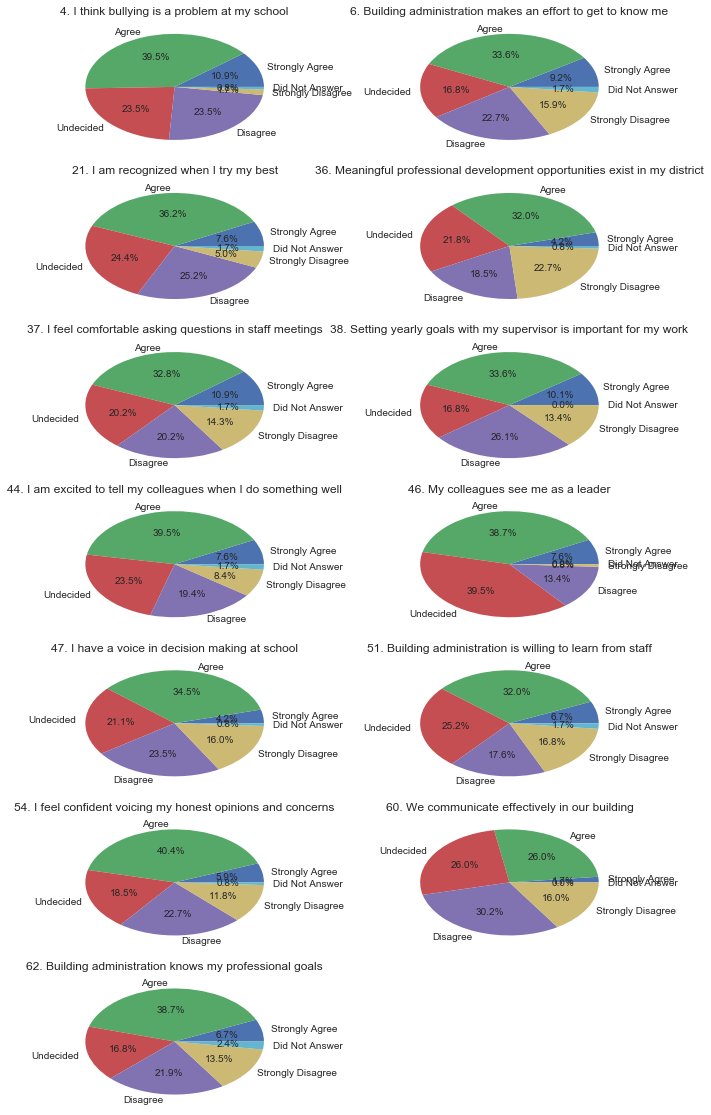

In [144]:
# Data to plot
fig, axes = plt.subplots(7, 2, figsize=(10,20))
 
# Plot
for i, (idx, row) in enumerate(posStaff.set_index('Question').iterrows()):
    ax = axes[i // 2, i % 2]
    perc = row[2:-3]
    ax.pie(perc, labels=list(row[2:-3].index),autopct='%1.1f%%')
    ax.set_title(idx)
fig.delaxes(axes[6,1])

fig.subplots_adjust(wspace=.5)